# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/Users/thomascartwright/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1)
# Load data from csv
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


In [3]:
# Investigate potential categorical attributes
auto_numeric.apply(lambda x: len(np.unique(x)))

normalized-losses           51
wheel-base                  40
length                      56
width                       33
height                      39
engine-size                 32
bore                        33
stroke                      31
compression-ratio           29
engine-power                48
peak-rpm                    20
city-mpg                    25
highway-mpg                 28
mean-effective-pressure    157
torque                     158
price                      145
dtype: int64

In [4]:
auto_numeric.shape

(159, 16)

In [5]:
auto_numeric.head()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


(2) It appears all the features a numeric (TODO: I won't get anything for saying that because the dataset is literally called "numeric"). TODO: ask about this cause I have no idea what they're looking fo

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

[]

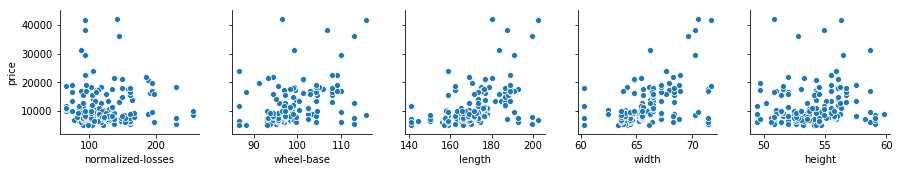

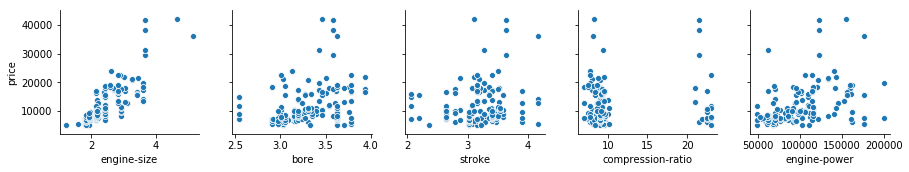

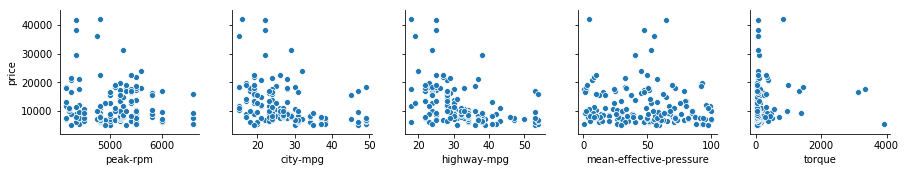

In [56]:
# (1) A.
# TODO: check if I should be using .corr() here
corrs = np.array([[attr, auto_numeric['price'].corr(auto_numeric[attr])] 
                  for attr in auto_numeric.drop(columns=['price'])])
corrs = corrs[corrs[:,1].argsort()]
# TODO: plot this
corrs
# TODO: order this by absolute value because this is incorrect (and then update the plots below)

# B. 
sns.pairplot(data=auto_numeric, x_vars=auto_numeric.drop(columns=['price']).columns[:5], y_vars=['price'])
sns.pairplot(data=auto_numeric, x_vars=auto_numeric.drop(columns=['price']).columns[5:10], y_vars=['price'])
sns.pairplot(data=auto_numeric, x_vars=auto_numeric.drop(columns=['price']).columns[10:15], y_vars=['price'])
plt.plot()

(2)
1. engine-size
2. width
3. length
4. engine-power
5. wheel-base

I reached this conclusion because they are highly correlated to price. The most useful tools was pandas.


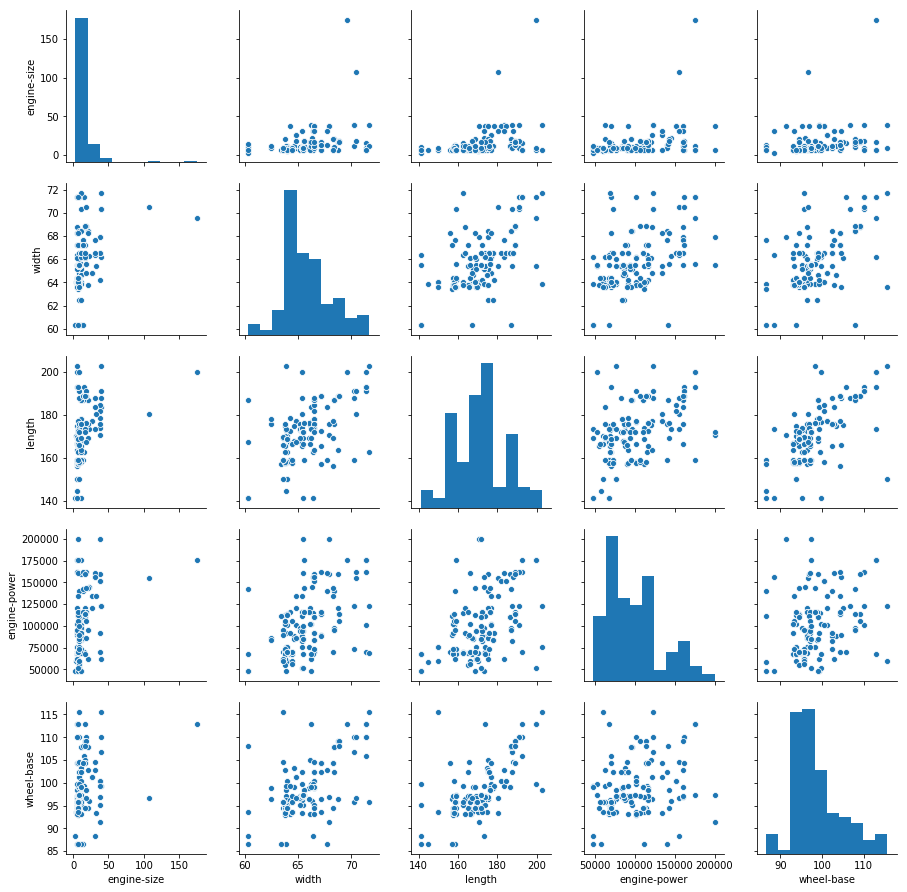

In [7]:
# (3)
sns.pairplot(auto_numeric, vars=["engine-size", "width", "length", "engine-power", "wheel-base"])

(4) From the above plot we can see that 
  * engine-power and length
  * length and wheel base
  * wheel-base and width
  
all appear to correlate with eachother

(5) height, stroke, compression-ratio, mean-effective-pressure

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

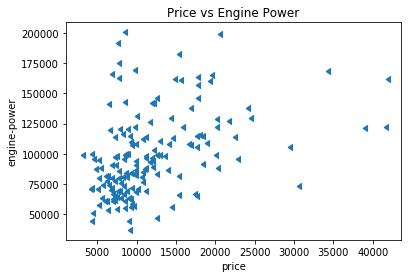

In [57]:
# (1)
scatter_jitter(auto_numeric['price'], auto_numeric['engine-power'])
plt.xlabel('price')
plt.ylabel('engine-power')
plt.title("Price vs Engine Power")
plt.show()

(2) It is going to be very difficult to use engine-power as a predictor of price. There appears to maybe be a vague correlation but there the scatter is still quite spread out with several outliers.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

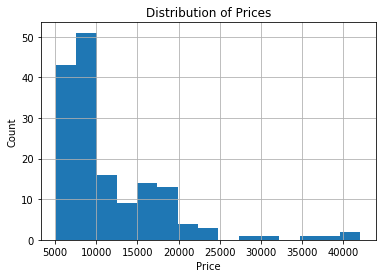

In [9]:
# (1)
# TODO: how to choose a sensible number of bins
auto_numeric['price'].hist(bins=15)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

(2) 

- Linear regression is known to be sensitive to outliers
- Prepocessing could include removing outliers TODO: and maybe performing some form of transform on the data
- TODO: why is it still not the case at this stage?

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [10]:
# TODO: confirm the independent and depenet variables ASK
X = np.expand_dims(auto_numeric['engine-power'], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, auto_numeric['price'], train_size = 0.8, test_size=0.2, random_state=0)



### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [11]:
# The baseline will be the line y = average price
def baseline_predict(X):
    return np.mean(y_train)

print(baseline_predict(X_train))

11853.267716535433


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [12]:
# (1)
# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)
# Report the model parameters.
print("The gradient of the line: " + str(lr.coef_[0]))
print("The intercept of the line: " + str(lr.intercept_))

The gradient of the line: 0.0898838874386661
The intercept of the line: 2823.121891102828


(2) 

- The gradient is positive and so this shows us that as the engine-power increases, the price will also increase.
- The gradient is also quite low which also shows that an increase in engine-power results in a small increase in price
- In this example the intercept is fairly meaningless but it tells us that a car without any engine-power is worth $2823

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

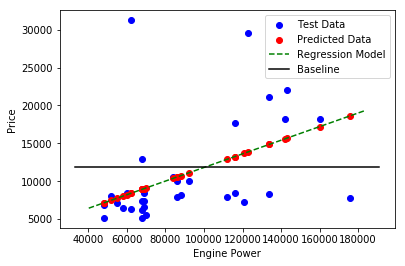

In [13]:
# (1)
fig, ax = plt.subplots()

# Plot the test data
plot_test = ax.scatter(X_test, y_test, c='blue', label='Test Data')

# Plot the linear regression model predictions on the test data
plot_pred = ax.scatter(X_test, lr.predict(X_test), c='red', label='Predicted Data')

# Calculate regression fit line and plot it
x_vals = np.array(ax.get_xlim())
y_vals = lr.intercept_ + lr.coef_ * x_vals
plot_lr, = ax.plot(x_vals, y_vals, '--', c='green', label='Regression Model')

# Plot the baseline
x_vals = np.array(ax.get_xlim())
y_vals = np.array([baseline_predict(x) for x in x_vals])
plot_baseline, = ax.plot(x_vals, y_vals, '-', c='black', label='Baseline')

# Add legend
ax.legend(handles=[plot_test, plot_pred, plot_lr, plot_baseline])

# Set the x and y labels
ax.set_ylabel('Price')
ax.set_xlabel('Engine Power')
plt.show()

(2) For lower values of Engine Power (<100,000) the linear regression model is clearly better at predicting price. However as the engine power increase the baseline and regression model probably acheive comparable accuracy since the spread of points becomes wider as engine power values increase above 100,000.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

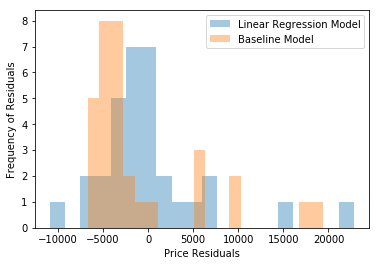

In [14]:
# (1)
num_bins = 20

# Get linear regression predictions
lr_pred = lr.predict(X_test)

# Get baseline predictions
baseline_pred = np.array([baseline_predict(x) for x in X_test])

# Plot histograms of residuals
lr_residuals = sns.distplot((y_test - lr_pred), label='Linear Regression Model', bins=num_bins, kde=False)
baseline_residuals = sns.distplot((y_test - baseline_predict(X_test)), label='Baseline Model', bins=num_bins, kde=False)

plt.xlabel("Price Residuals")
plt.ylabel("Frequency of Residuals")

plt.legend()
plt.show()

### Linear Regression Model

In [15]:
# (2)
print("Coefficient of Determination: " + str(r2_score(y_test, lr_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(y_test, lr_pred)))

Coefficient of Determination: 0.16852372539951466
Root Mean Squared Error (RMSE): 37868071.272100724


### Baseline Model

In [16]:
print("Coefficient of Determination: " + str(r2_score(y_test, baseline_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(y_test, baseline_pred)))

Coefficient of Determination: -0.015399260296584893
Root Mean Squared Error (RMSE): 46244508.39204617


(3)

- The residuals show us what the error is on each data point for each model. And so this histogram shows us what the residuals were and any patterns in them, for example how many times did the linear regression model underestimate the actual price by ~$5000. 

- We can see from our histogram that the baseline model is under estimating the value of price by a large margin and more frequently than the linear regression model. The linear regression model has the majority of it's residuals close to 0, whereas the baseline model has the majority of it's residuals clustered aroun -$5000.
- The coefficient of determination tells us how close the actual data points are to our line fitted by our models. A higher coefficient of determination is better and we can therefore see that our linear regression model is performing better.
- The Root Mean Squared Error (RMSE) is the standard deviation of the residuals and it, roughly speaking, tells you how close the actual data points are to our line. A lower value is better and we can therefore see that our linear regression model is performing better than the baseline model.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) By using our test set for validation we have, in essence, performed some training on the test set and so we no longer have a set that we can use to estimate the generalisation error.

In [17]:
# (2)
# Create 5-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Visualise the splits on the dataset
for train_idx, test_idx in kf.split(auto_numeric):
    print("Training set indices: " + str(train_idx))
    print("Testing set indices: " + str(test_idx))

Training set indices: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158]
Testing set indices: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
Training set indices: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84

In [18]:
# (3)
# Create a new linear regression model and train it using kfold cross validation
lr = LinearRegression()
y_pred = cross_val_predict(lr, np.expand_dims(auto_numeric['engine-power'], axis=1), auto_numeric['price'], cv=kf)

### Linear Regression Model Trained using K-Fold Cross Validation

In [19]:
print("Coefficient of Determination: " + str(r2_score(auto_numeric['price'], y_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(auto_numeric['price'], y_pred)))

Coefficient of Determination: 0.1730052709757075
Root Mean Squared Error (RMSE): 37386524.71084189


(4) This model performed marginally better than the linear regression model trained in 2.7, we can see this since the coefficient of determination is slightly higher and the RMSE is slightly lower. This suggests that using KFold cross validation was beneficial for the model.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [20]:
# (1)
# TODO: check the actual datafile
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

In [21]:
# Build a linear regression model on the auto_base dataset
lr = LinearRegression()
lr.fit(np.expand_dims(auto_base['engine-power'], axis=1), auto_base['price'])
y_pred = lr.predict(np.expand_dims(auto_base['engine-power'], axis=1))

### Linear Regression Model Training on Auto-Base Dataset

In [22]:
print("Coefficient of Determination: " + str(r2_score(auto_base['price'], y_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(auto_base['price'], y_pred)))

Coefficient of Determination: 0.0
Root Mean Squared Error (RMSE): 45207694.07436414


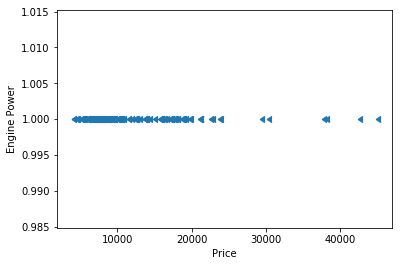

In [23]:
# (2)
# Produce a scatter plot of price vs. engine-power
scatter_jitter(auto_base['price'], auto_base['engine-power'])
plt.xlabel('Price')
plt.ylabel('Engine Power')
plt.show()

In [24]:
# Print coefficients of linear regression fit
print(lr.coef_)
print(lr.intercept_)

[0.]
11684.723270440252


In [25]:
# Inspect a summary of the data
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


In [26]:
# Inspect the first 10 items
auto_base[:10]

,engine-power,price
0,1.0,13950.0
1,1.0,17450.0
2,1.0,17710.0
3,1.0,23875.0
4,1.0,16430.0
5,1.0,16925.0
6,1.0,20970.0
7,1.0,21105.0
8,1.0,5151.0
9,1.0,6295.0


(2) - Final Conclusion(s)

- Every row in this dataset has the same value of engine power. This results in a model that just predicts the mean of the prices everytime, producing an innacurate model.
- You can use the engine power as a predictor because we don't know what happens to price when engine power changes, because we don't have any example with which to train the model.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [27]:
# (1)
# Create and filt our linear regression model
mvlr = LinearRegression()
mvlr.fit(auto_numeric.drop(columns=['price']), auto_numeric['price'])

# Evaluate it using our KFold instance
y_pred = cross_val_predict(mvlr, auto_numeric.drop(columns=['price']), auto_numeric['price'], cv=kf)

# Evaluate our model 
print("Coefficient of Determination: " + str(r2_score(auto_numeric['price'], y_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(auto_numeric['price'], y_pred)))

Coefficient of Determination: 0.48613798445730905
Root Mean Squared Error (RMSE): 23230516.795090124


(2) 
- We can clearly see that the cross valdiation method on auto_numeric has resulted in a less accurate model. The coefficient of determination is significantly lower and then RMSE is significantly higher indicating a model that does not fit the data well.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

In [28]:
# (1) # Your Code goes here:

(2) 

- There appear to be outliers in the dataset and linear regression is known to not handle outliers well.
- Inspecting the distribution on the graph suggests that the relationship between engine-size and price is not linear

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

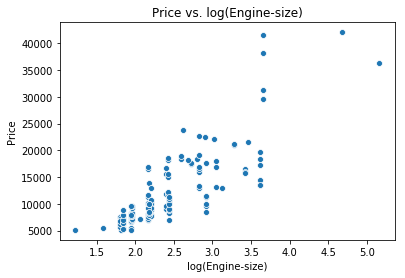

In [29]:
# (1)
# The original scatter plot appears to show an exponential distribution 
# therefore we are going to take the logarithm of the engine-size attribute

# Take log of the engine-size attribute
log_engine_size = np.log(auto_numeric['engine-size'])

# Plot this as a scatter plot against the price attribute
ax = sns.scatterplot(log_engine_size, auto_numeric['price'])
ax.set_xlabel('log(Engine-size)')
ax.set_ylabel('Price')
ax.set_title('Price vs. log(Engine-size)')
plt.show()

In [30]:
# (2)
mvlr_log = LinearRegression()

# Replace the original engine-size attribute with the log(engine-size)
auto_numeric['engine-size'] = log_engine_size

# Fit the new linear regression model
mvlr_log.fit(auto_numeric.drop(columns=['price']), auto_numeric['price'])

# Make predictions for the prices
y_pred = cross_val_predict(mvlr_log, auto_numeric.drop(columns=['price']), auto_numeric['price'], cv=kf)

### Linear Regression Model with Log of the Engine-Size Attribute

In [31]:
print("Coefficient of Determination (R^2): " + str(r2_score(auto_numeric['price'], y_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(auto_numeric['price'], y_pred)))

Coefficient of Determination (R^2): 0.6896122680289434
Root Mean Squared Error (RMSE): 14031913.63138326


The model is not significantly better, this is most likely due to the preprocessed engine-size attribute now being a good indicator of price.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1)

- You cannot just read off the values of coefficients because different attributes have different magnitudes of numbers e.g. the engine-power attribute has a largest value of 200000 but the compression-ratio attribute has a maximum value of 23. This means to "move" the compression-ratio attribute requires a much larger coefficient than to "move" the engine-power attribute. 
- To solve this issue we need to normalize the attributes.
    
TODO: I can then justify my answer using the equations that appear in linear algebra theory and show how weights need to be big to shift an attribute.

In [32]:
# (2)
# Extract the attributes from the target
auto_numeric_attr = auto_numeric.drop(columns=['price'])

# Normalise all the attributes
norm_auto_numeric = (auto_numeric_attr-auto_numeric_attr.mean())/auto_numeric_attr.std()

# Fit the the model to the new normalised data
mvlr.fit(norm_auto_numeric, auto_numeric['price'])

# Extract the coefficients from the model
coeff_series = {'attr': norm_auto_numeric.columns, 'coeff': mvlr.coef_}
coeffs = pd.DataFrame(data=coeff_series)

coeffs

,attr,coeff
0,normalized-losses,-298.496352
1,wheel-base,404.648538
2,length,-39.504796
3,width,1385.818765
4,height,410.559863
5,engine-size,5114.588961
6,bore,-435.518934
7,stroke,-770.012458
8,compression-ratio,779.881655
9,engine-power,-544.509219


In [33]:
# Now order the attributes by the coefficiencts absolute value
coeffs['abs'] = abs(coeffs['coeff'])
coeffs.sort_values(by='abs', ascending=False)

,attr,coeff,abs
5,engine-size,5114.588961,5114.588961
12,highway-mpg,-1404.041281,1404.041281
3,width,1385.818765,1385.818765
8,compression-ratio,779.881655,779.881655
7,stroke,-770.012458,770.012458
10,peak-rpm,716.848947,716.848947
11,city-mpg,617.458965,617.458965
9,engine-power,-544.509219,544.509219
13,mean-effective-pressure,-537.651628,537.651628
6,bore,-435.518934,435.518934


(3) 
From the above dataframe we can see that the 3 most important attributes are:

1. engine-size
2. highway-mpg
3. width

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) 

- Visualising the data is the best option for choosing which features to test higher orders on
- Choosing the best polynomial order can be done several ways. One way would be to visualise the data and see if an obvious polynomial is apparent. Another option would be to use your validation set to tune the order of the polynomial.

In [34]:
# (2)
# Load data from csv
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
auto_nonlinear = pd.read_csv(data_path, delimiter = ',')
auto_nonlinear.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,2.384639,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,0.609154,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,1.220830,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,1.940179,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,2.200552,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,2.700158,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,5.159974,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


Text(0.5,1,'Engine-power')

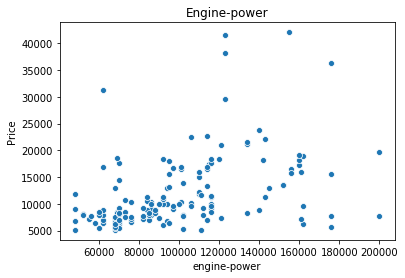

In [35]:
# Visualise the engine-power attribute
ax = sns.scatterplot(auto_nonlinear['engine-power'], auto_nonlinear['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-power')

Text(0.5,1,'length')

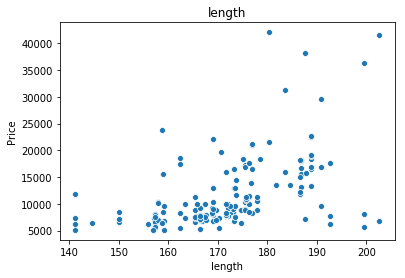

In [36]:
# Visualise the length attribute
ax = sns.scatterplot(auto_nonlinear['length'], auto_nonlinear['price'])
ax.set_ylabel('Price')
ax.set_title('length')

In [37]:
# Add a second order basis to the engine-power and length attributes
auto_nonlinear['engine-power2'] = auto_nonlinear['engine-power']**2
auto_nonlinear['length2'] = auto_nonlinear['length']**2

In [38]:
# Train the Linear Regression Model
so_lr = LinearRegression()
so_lr.fit(auto_nonlinear.drop(columns=['price']), auto_nonlinear['price'])

# Predict the price
price_pred = so_lr.predict(auto_nonlinear.drop(columns=['price']))

print("Coefficient of Determination (R^2): " + str(r2_score(auto_nonlinear['price'], price_pred)))
print("Root Mean Squared Error (RMSE): " + str(mean_squared_error(auto_nonlinear['price'], price_pred)))

Coefficient of Determination (R^2): 0.7725644238597819
Root Mean Squared Error (RMSE): 10281837.947773736


(3) We can see that our model has achieved a higher coefficient of determination and a lower RMSE meaning that the model has done a better job at predicting the price.